# Homework 2 

- Implement Naive Bayes model (remember about smoothing). 
- Find a reasonably interesting but not to complicated dataset for which you will be able to use this model to perform binary classification. Do the latter.
- Produce the confussion matrix, calculate accuracy, precission, recall
- Check how your model does against its version from sklearn and logistic regression from sklearn. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## Loading dataset

In [2]:
# (dataset and code for loading dataset shared by Sylwester Klocek)

data = pd.read_csv('./titanic.csv')
data_count = len(data)
for i in range(data_count):
    if data.loc[i]['Freq'] > 0:
        data = data.append([data.loc[i]] * data.loc[i]['Freq'], ignore_index=True)   
        
data = data[data_count:]
data.drop(['Unnamed: 0', 'Freq'], axis=1, inplace=True)

In [3]:
len(data)

2201

In [4]:
data.head()

,Class,Sex,Age,Survived
32,3rd,Male,Child,No
33,3rd,Male,Child,No
34,3rd,Male,Child,No
35,3rd,Male,Child,No
36,3rd,Male,Child,No


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.loc[:, data.columns != "Survived"], data["Survived"],
                                                    test_size=0.2,
                                                    random_state=10)

## Naive Bayes model definition

In [6]:
def inc(d, k, step=1):
    if k not in d:
        d[k] = step
    else:
        d[k] += step
        
def get(d, k, default=0):
    if k not in d:
        return default
    return d[k]

class NaiveBayes:
    def __init__(self, classes):
        self.classes = np.array(classes)
        
    def fit(self, xs, ys):
        xs = xs.as_matrix()
        ys = ys.as_matrix()
        self.pis = np.array([np.sum(ys == k) for k in self.classes]) / len(ys)
        self.ds = {}
        self.xs = {}
        self.ys = {}
        for i, x in enumerate(xs):
            inc(self.ys, ys[i])
                
            for j, x_j in enumerate(x):
                inc(self.xs, (j, x_j))
                inc(self.ds, (j, x_j, ys[i]))
    
    def get_pks(self, x):
        return [np.prod([(get(self.ds, (i, x[i], k)) + 1) / (get(self.ys, k) + get(self.xs, (i, x[i])))
                         for i in range(len(x))])
                for k in self.classes]
    
    def predict(self, xs):
        xs = xs.as_matrix()
        p = np.multiply(self.pis, [self.get_pks(x) for x in xs])
        return self.classes[np.argmax(p, axis=1)]

## Model training and evaluation

In [7]:
m = NaiveBayes(np.unique(y_train))
m.fit(x_train, y_train)

In [8]:
y_predicted = m.predict(x_test)

In [9]:
accuracy_score(y_test, y_predicted)

0.7709750566893424

In [10]:
precision_score(y_test == 'Yes', y_predicted == 'Yes')

0.90625

In [11]:
recall_score(y_test == 'Yes', y_predicted == 'Yes')

0.3790849673202614

In [12]:
con_mat = confusion_matrix(y_test, y_predicted)
con_mat

array([[282,   6],
       [ 95,  58]])

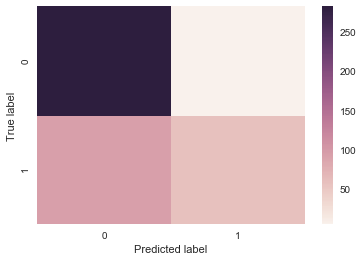

In [13]:
sns.heatmap(con_mat)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Comparing results with SciKit Learn

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
x_train_dummy = pd.get_dummies(x_train)
model.fit(x_train_dummy, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
x_test_dummy = pd.get_dummies(x_test)
y_predicted_sk = model.predict(x_test_dummy)

In [16]:
accuracy_score(y_test, y_predicted_sk)

0.7891156462585034

In [17]:
precision_score(y_test == 'Yes', y_predicted_sk == 'Yes')

0.7727272727272727

In [18]:
recall_score(y_test == 'Yes', y_predicted_sk == 'Yes')

0.5555555555555556

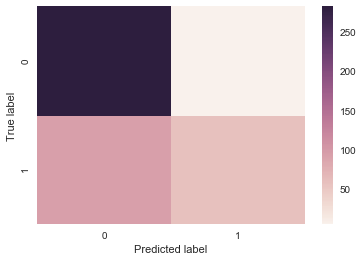

In [20]:
con_mat_sk = confusion_matrix(y_test, y_predicted)
sns.heatmap(con_mat_sk)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [21]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
y_train_dummy = pd.get_dummies(y_train)
model_lr.fit(x_train_dummy, y_train_dummy)
y_predicted_lr = model_lr.predict(x_test_dummy).argmax(axis=1)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [22]:
accuracy_score(y_test == 'Yes', y_predicted_lr)

0.7891156462585034

In [23]:
precision_score(y_test == 'Yes', y_predicted_lr)

0.7727272727272727

In [24]:
recall_score(y_test == 'Yes', y_predicted_lr)

0.5555555555555556

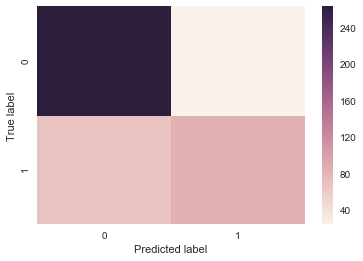

In [25]:
con_mat_lr = confusion_matrix(y_test == 'Yes', y_predicted_lr)
sns.heatmap(con_mat_lr)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Conclusions

Results of all models look very similar.

When tested using different train/test splits, **accuracy** scores for all models are about the same, **precision** is higher in my model, but **recall** is higher in SciKit Learn models.

That might be a result of applying Laplace smoothing.